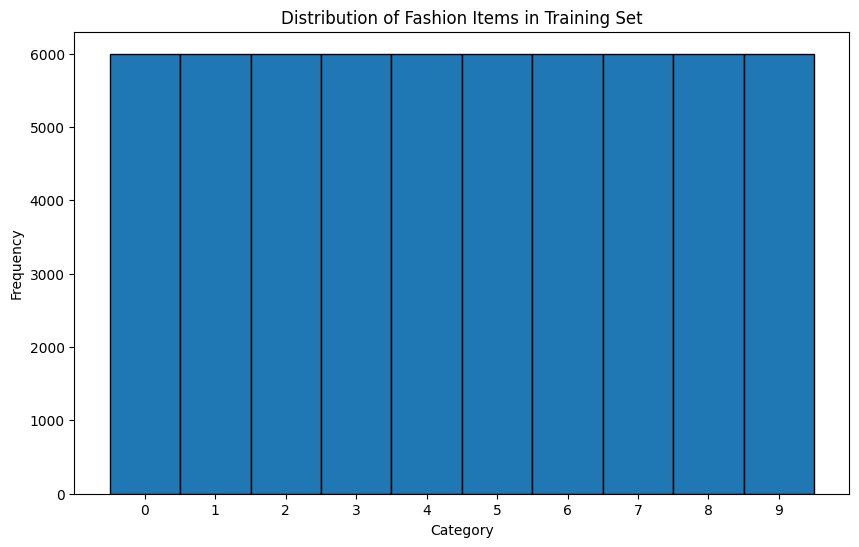

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

# MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=np.arange(11)-0.5, edgecolor='black')
plt.xticks(np.arange(10))
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Distribution of Fashion Items in Training Set')
plt.show()

X_train, X_test = X_train / 255.0, X_test / 255.0

# (28x28) to a 1D vector of 784 features
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),  # Input layer with 128 units and ReLU activation
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    layers.Dropout(0.2),  # Dropout layer
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for the 10 classes and softmax activation
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4697 - loss: 1.5144 - val_accuracy: 0.7512 - val_loss: 0.7222
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7102 - loss: 0.8088 - val_accuracy: 0.7922 - val_loss: 0.6020
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7593 - loss: 0.6850 - val_accuracy: 0.8112 - val_loss: 0.5427
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7849 - loss: 0.6193 - val_accuracy: 0.8187 - val_loss: 0.5096
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7971 - loss: 0.5802 - val_accuracy: 0.8243 - val_loss: 0.4887
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8126 - loss: 0.5437 - val_accuracy: 0.8359 - val_loss: 0.4647
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8206 - loss: 0.5178 - val_accuracy: 0.8407 - val_loss: 0.4493
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8224 - loss: 0.5043 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 0.3903
Test accuracy: 0.8555


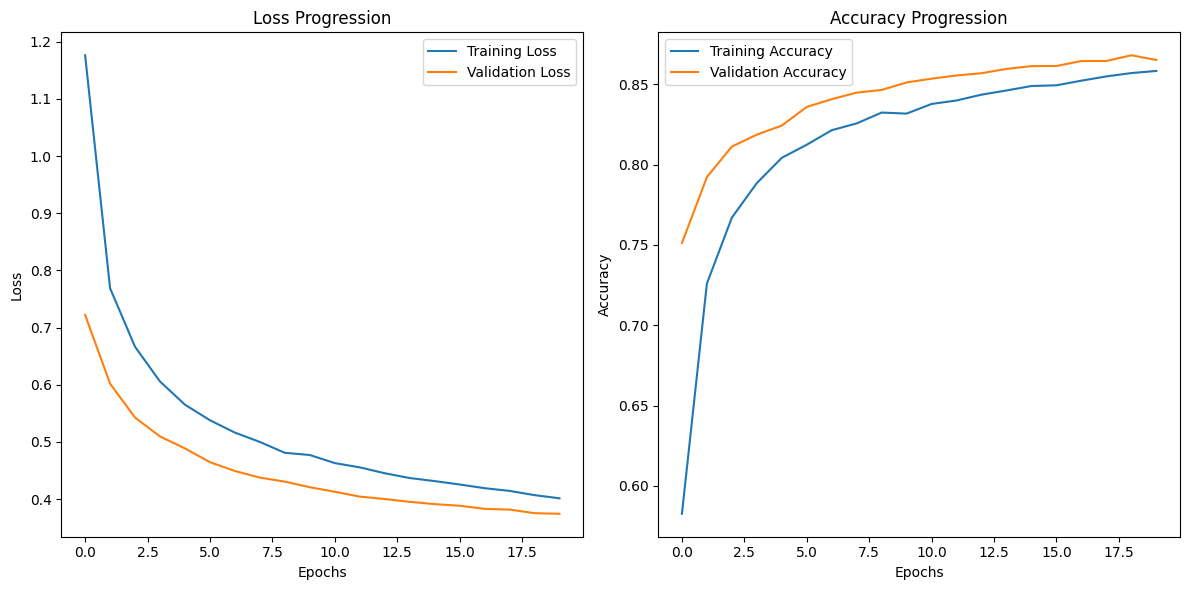

In [ ]:
3 # Evaluate model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

plt.figure(figsize=(12, 6))

# Loss thing
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Progression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Progression')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
